In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
orders_merged = pd.read_csv('data__for__ml.csv', index_col=0, engine='python')

In [3]:
# Cleaning up data for classificiations

orders_merged_delegate = orders_merged[orders_merged.Registration_Type == 'Delegate']
orders_merged_delegate['EQ_perc_of_ttl_Rev'] = orders_merged_delegate['EQ_perc_of_ttl_Rev'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['Mktg_perc_of_ttl_Rev'] = orders_merged_delegate['Mktg_perc_of_ttl_Rev'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['Sales_perc_of_ttl_rev'] = orders_merged_delegate['Sales_perc_of_ttl_rev'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['Active_Conversion_Rate'] = orders_merged_delegate['Active_Conversion_Rate'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['Passive_Conversion_Rate'] = orders_merged_delegate['Passive_Conversion_Rate'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['ROI__fcst'] = orders_merged_delegate['ROI__fcst'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['ROI__act'] = orders_merged_delegate['ROI__act'].replace('[\%, ]', '', regex=True)
orders_merged_delegate['Sales_and_Mktg_ROI'] = orders_merged_delegate['Sales_and_Mktg_ROI'].replace('[\%, ]', '', regex=True)
orders_merged_delegate = orders_merged_delegate.drop('Event_Plan_Start_Date', 1)
orders_merged_delegate = orders_merged_delegate.drop('Event_Plan_Date', 1)
orders_merged_delegate = orders_merged_delegate.drop('Order_Date', 1)
orders_merged_delegate = orders_merged_delegate.drop('Event_Plan_Name', 1)
orders_merged_delegate = orders_merged_delegate.drop('Promotion_Plan', 1)
orders_merged_delegate = orders_merged_delegate.drop('Type', 1)
orders_merged_delegate = pd.concat([orders_merged_delegate.drop('Topic_Area', axis=1)\
                                    , pd.get_dummies(orders_merged_delegate['Topic_Area'])], axis=1)
orders_merged_delegate = pd.concat([orders_merged_delegate.drop('job_title', axis=1)\
                                    , pd.get_dummies(orders_merged_delegate['job_title'])], axis=1)
orders_merged_delegate = pd.concat([orders_merged_delegate.drop('Sales_Source_Cat', axis=1)\
                                    , pd.get_dummies(orders_merged_delegate['Sales_Source_Cat'])], axis=1)
orders_merged_delegate = orders_merged_delegate.drop('Sales_Source', axis=1)
orders_merged_delegate = pd.concat([orders_merged_delegate.drop('Sales_Method', axis=1)\
                                    , pd.get_dummies(orders_merged_delegate['Sales_Method'])], axis=1)
orders_merged_delegate = orders_merged_delegate.drop('Registration_Type', 1)
orders_merged_delegate = orders_merged_delegate.drop('Contact_Job_Title', 1)
orders_merged_delegate = orders_merged_delegate.drop('Registration_Channel', 1)
orders_merged_delegate = orders_merged_delegate.drop('Order_Number', 1)
orders_merged_delegate = orders_merged_delegate.drop('MAC', 1)
orders_merged_delegate = orders_merged_delegate.drop('Currency', 1)
orders_merged_delegate = orders_merged_delegate.drop('Contact_Job_Function', 1)
orders_merged_delegate = orders_merged_delegate.drop('Campaign_Name', 1)
orders_merged_delegate = orders_merged_delegate.drop('Account_Name', 1)
orders_merged_delegate = orders_merged_delegate.drop('Account_Market', 1)
orders_merged_delegate = pd.concat([orders_merged_delegate.drop('Price_List_Type', axis=1)\
                                    , pd.get_dummies(orders_merged_delegate['Price_List_Type'])], axis=1)
orders_merged_delegate = orders_merged_delegate.drop('Price_List', 1)
orders_merged_delegate = orders_merged_delegate.drop('Created', 1)
orders_merged_delegate = orders_merged_delegate.drop('Account_SIC', 1)
orders_merged_delegate = orders_merged_delegate.drop('Upsell', 1)
orders_merged_delegate = orders_merged_delegate.drop('Sales_and_Mktg_ROI', 1)
orders_merged_delegate = orders_merged_delegate.drop('Active_Conversion_Rate', 1)
orders_merged_delegate = orders_merged_delegate.drop('Mktg_perc_of_ttl_Rev', 1)
orders_merged_delegate = orders_merged_delegate.drop('Passive_Conversion_Rate', 1)

orders_merged_delegate.rename(columns={'Delegate Sales': 'Delegate_Sales', 'ACD Conversion': 'ACD_Conversion',\
                                      'Full Delegate Sale': 'Full_Delegate_Sale', \
                                       'Inquiry Conversion': 'Inquiry_Conversion',\
                                       'PDF Conversion': 'PDF_Conversion'}, inplace=True)


# Note for future examination - maybe reintroduce account SIC later via LabelEncoder?
orders_merged_delegate = orders_merged_delegate.fillna(orders_merged_delegate.mean())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [4]:
from sklearn.linear_model import LinearRegression

#removing features that are collinear or not meaningful
orders_merged_delegate = orders_merged_delegate.drop('Vendor', 1)
orders_merged_delegate = orders_merged_delegate.drop('Sell Side', 1)
orders_merged_delegate = orders_merged_delegate.drop('Defense Manufacturer', 1)
orders_merged_delegate = orders_merged_delegate.drop('Code', 1)
orders_merged_delegate = orders_merged_delegate.drop('id', 1)
orders_merged_delegate = orders_merged_delegate.drop('Mktg_Cost__fcst', 1)
orders_merged_delegate = orders_merged_delegate.drop('Mktg_Cost_act', 1)
orders_merged_delegate = orders_merged_delegate.drop('Cost_of_Acquisition', 1)
orders_merged_delegate = orders_merged_delegate.drop('PP__fcst', 1)
orders_merged_delegate = orders_merged_delegate.drop('ROI__fcst', 1)
orders_merged_delegate = orders_merged_delegate.drop('ROI__act', 1)
orders_merged_delegate = orders_merged_delegate.drop('All_Revenue', 1)
orders_merged_delegate = orders_merged_delegate.drop('Marketing', 1)
orders_merged_delegate_grouped = orders_merged_delegate
orders_merged_delegate = orders_merged_delegate.drop('Event_Plan_Code', 1)

#looking at primary passes only
orders_merged_delegate_primary = orders_merged_delegate[orders_merged_delegate.Primary == 1]

orders_merged_delegate_primary = orders_merged_delegate_primary.drop('Primary', 1)

y = orders_merged_delegate_primary['Total_Net_Price']
X = orders_merged_delegate_primary.drop('Total_Net_Price', 1)

lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
Coefs = pd.DataFrame(list(zip(np.array(list(X)), lm.coef_)), columns = ['Features', 'Estimated_Coeffs'])
Coefs.reindex(Coefs.Estimated_Coeffs.abs().sort_values(inplace=False, ascending = False).index)

,Features,Estimated_Coeffs
45,Full_Delegate_Sale,-252.198421
44,ACD_Conversion,-241.637779
47,PDF_Conversion,-203.677962
43,Delegate_Sales,-185.815869
32,HR,-140.924734
46,Inquiry_Conversion,-99.902770
35,Procurement,74.080644
34,Pharma,68.909413
36,Retail,-68.135126
42,VP,38.873582


In [6]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2.astype(float))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Total_Net_Price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     594.7
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:51:22   Log-Likelihood:            -1.3463e+05
No. Observations:               17997   AIC:                         2.694e+05
Df Residuals:                   17951   BIC:                         2.697e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [7]:
from sklearn.metrics import mean_squared_error

predictions = est2.predict(X2.astype(float)).values
target = y.values
rms = np.sqrt(mean_squared_error (target,predictions))
rms

429.1726674874317

In [8]:
X_lim = orders_merged_delegate_primary[['Group_Size','Total_Dels', 'Days_Ahead_of_Event', 'CX', 'Finance', 'Pharma', \
                                        'Logistics', 'HR', 'Procurement', 'Delegate_Sales', 'Full_Delegate_Sale', \
                                       'Booking_Pattern_Comparison', 'Total_Guests', 'Mktg_Dels', 'Num_Active_Inq', \
                                       'Spex_Rev', 'Director', 'Manager', 'VP', 'Delegate_Sales']]

X2 = sm.add_constant(X_lim)
est = sm.OLS(y, X2.astype(float))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Total_Net_Price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     739.8
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:51:29   Log-Likelihood:            -1.3765e+05
No. Observations:               17997   AIC:                         2.753e+05
Df Residuals:                   17977   BIC:                         2.755e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [9]:
predictions = est2.predict(X2.astype(float)).values
print(predictions)
target = y.values
target

[ 846.54327238 1202.56061515 1167.65638792 ... 1330.57181645 1238.22026564
 1692.25102708]


array([ 874.5 ,  874.5 ,  874.5 , ...,  899.  , 1124.25, 1499.  ])

In [10]:
rms = np.sqrt(mean_squared_error (target,predictions))
rms

507.4194148156286

### This features subset on its own removed some of the explanatory power of the model with an increased the RMSE. We will next look to better the model by addressing colliniatiry through VIF

### Checking for Variance Inflagtion Factors to identify colliniarity between variables

In [14]:
#Imports
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [15]:
X_df = orders_merged_delegate_primary

X_df.Sales_perc_of_ttl_rev = pd.to_numeric(X_df.Sales_perc_of_ttl_rev)
X_df.EQ_perc_of_ttl_Rev = pd.to_numeric(X_df.EQ_perc_of_ttl_Rev)

In [16]:
vifs = pd.Series([variance_inflation_factor(X_df.values, i) 
               for i in range(X_df.shape[1])], 
              index=X_df.columns)
vifs

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Total_Net_Price               2.490922e+00
Group_Size                    1.133546e+00
Days_Ahead_of_Event           1.090011e+00
Total_Dels                             inf
Total_Rev                     5.970964e+11
Booking_Pattern_Comparison    3.617377e+01
Total_Guests                  5.814894e+01
Avg_Cost_of_Acquisition       2.287702e+00
Mktg_Dels                              inf
Mktg_Rev                      2.739607e+10
Mktg_Price_Point              8.715692e+00
PP__act                       8.878499e+01
Sales_Dels                             inf
Sales_Rev                     9.425010e+10
Sales_perc_of_ttl_rev         9.349752e+00
Sales_Price_Point             4.091865e+01
Num_Active_Inq                7.564894e+00
Active_Inq_Del                         inf
Num_Passive_PDF               3.832000e+01
Passive_PDF_Del                        inf
Total_EQ_Rev                  1.188473e+11
EQ_Price_Point                3.699718e+01
EQ_perc_of_ttl_Rev            8.316292e+00
Spex_Rev   

In [17]:
# Removing categorial variables for vifs
X_df = X_df.drop(['Sales_Dels', 'CX', 'Finance', 'HR', 'Logistics', 'Pharma', 'Procurement', 'Retail',\
                 'C-Level', 'Consultant', 'Director', 'Manager', 'Other', 'VP'] ,axis=1)

In [18]:
vifs = pd.Series([variance_inflation_factor(X_df.values, i) 
               for i in range(X_df.shape[1])], 
              index=X_df.columns)
vifs

Total_Net_Price               1.180889e+01
Group_Size                    2.228093e+00
Days_Ahead_of_Event           3.311928e+00
Total_Dels                    2.308837e+03
Total_Rev                     1.194589e+12
Booking_Pattern_Comparison    7.422436e+01
Total_Guests                  8.863604e+01
Avg_Cost_of_Acquisition       3.069729e+00
Mktg_Dels                     1.994895e+02
Mktg_Rev                      5.695460e+10
Mktg_Price_Point              1.288882e+02
PP__act                       1.934444e+02
Sales_Rev                     1.847744e+11
Sales_perc_of_ttl_rev         3.903884e+01
Sales_Price_Point             2.655718e+02
Num_Active_Inq                1.711316e+01
Active_Inq_Del                1.927565e+02
Num_Passive_PDF               8.145121e+01
Passive_PDF_Del               5.746726e+02
Total_EQ_Rev                  2.065208e+11
EQ_Price_Point                3.099108e+02
EQ_perc_of_ttl_Rev            2.979943e+01
Spex_Rev                      3.017306e+02
Spex_Last_Y

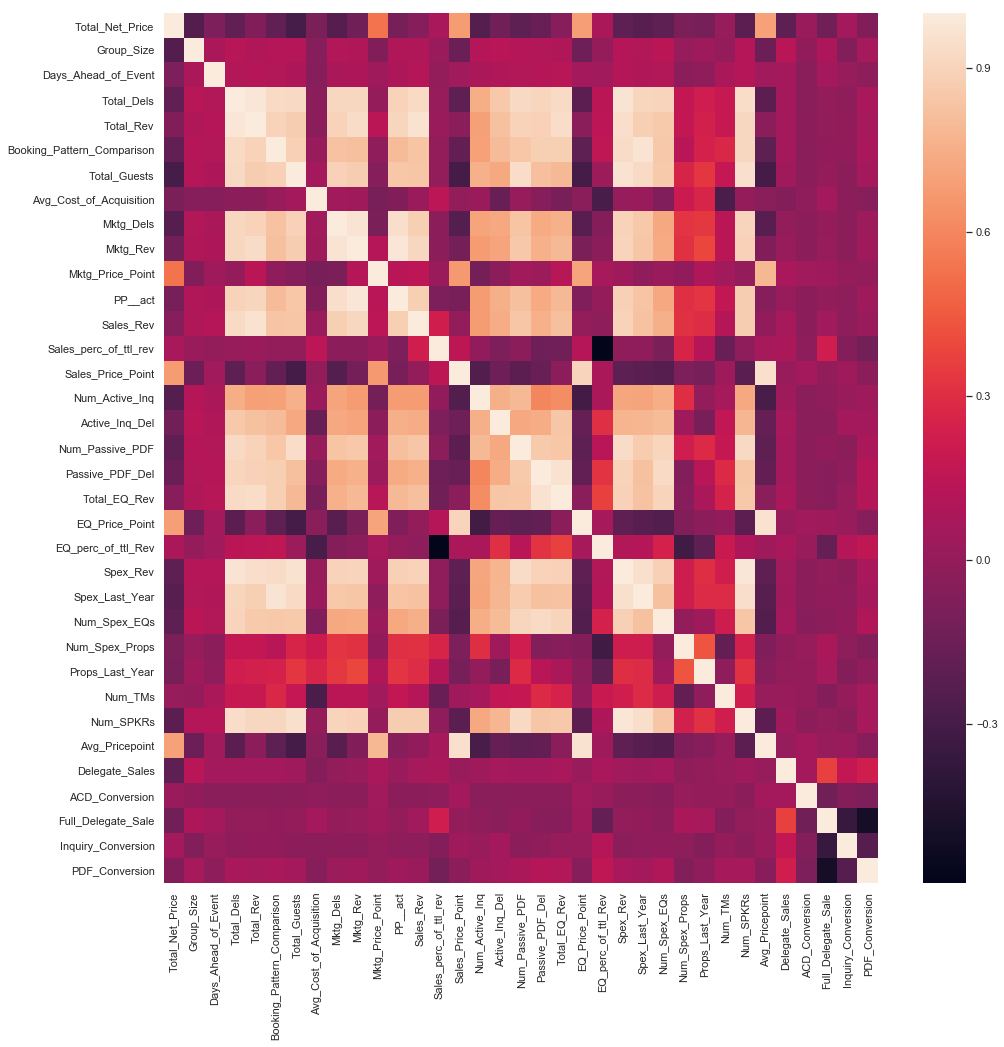

In [19]:
import seaborn as sns; sns.set()
plt.figure(figsize=(16, 16))
ax = sns.heatmap(X_df.corr())

### Removing highlly collinear variables iritavely. The removals are all shown together but were done one at a time and vifs re-run each time.

In [20]:
X_df = X_df.drop(['Total_Dels'], axis=1)
X_df = X_df.drop(['Total_EQ_Rev'], axis=1)
X_df = X_df.drop(['Total_Rev'], axis=1)
X_df = X_df.drop(['Avg_Pricepoint'], axis=1)
X_df = X_df.drop(['Mktg_Rev'], axis=1)
X_df = X_df.drop(['Spex_Rev'], axis=1)
X_df = X_df.drop(['EQ_Price_Point'], axis=1)
X_df = X_df.drop(['Booking_Pattern_Comparison'], axis=1)
X_df = X_df.drop(['Num_SPKRs'], axis=1)
X_df = X_df.drop(['PP__act'], axis=1)
X_df = X_df.drop(['Delegate_Sales'], axis=1)
X_df = X_df.drop(['Num_Passive_PDF'], axis=1)
X_df = X_df.drop(['Mktg_Price_Point'], axis=1)
X_df = X_df.drop(['Total_Guests'], axis=1)
X_df = X_df.drop(['Passive_PDF_Del'], axis=1)
X_df = X_df.drop(['Sales_Price_Point'], axis=1)
X_df = X_df.drop(['Sales_Rev'], axis=1)
X_df = X_df.drop(['Spex_Last_Year'], axis=1)
X_df = X_df.drop(['EQ_perc_of_ttl_Rev'], axis=1)
X_df = X_df.drop(['Sales_perc_of_ttl_rev'], axis=1)
X_df = X_df.drop(['Mktg_Dels'], axis=1)

vifs = pd.Series([variance_inflation_factor(X_df.values, i) 
               for i in range(X_df.shape[1])], 
              index=X_df.columns)
vifs

Total_Net_Price            3.285925
Group_Size                 2.050816
Days_Ahead_of_Event        2.923053
Avg_Cost_of_Acquisition    1.813152
Num_Active_Inq             8.678442
Active_Inq_Del             6.759392
Num_Spex_EQs               6.151958
Num_Spex_Props             4.108647
Props_Last_Year            3.229573
Num_TMs                    2.711697
ACD_Conversion             1.090893
Full_Delegate_Sale         2.920380
Inquiry_Conversion         1.626316
PDF_Conversion             2.057899
dtype: float64

In [21]:
#Rerunning Regression and checking the effect of the removals on MSE
y = X_df['Total_Net_Price']
X = X_df.drop('Total_Net_Price', 1)

lm = LinearRegression()
lm.fit(X, y)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2.astype(float))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Total_Net_Price   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     282.5
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:52:44   Log-Likelihood:            -1.4117e+05
No. Observations:               17997   AIC:                         2.824e+05
Df Residuals:                   17983   BIC:                         2.825e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [22]:
predictions = est2.predict(X2.astype(float)).values
target = y.values
rms = np.sqrt(mean_squared_error (target,predictions))
rms

617.2412796576789

### Unfortuantelly addressing collinearity seems to have lowered the strength of the model. 

### Dropping Delegate Sales registrations to remove the human discounting bias

In [23]:
orders_merged_delegate_primary_mktg = orders_merged_delegate_primary[orders_merged_delegate_primary['Delegate_Sales'] == 0]

In [24]:
orders_merged_delegate_primary_mktg = orders_merged_delegate_primary_mktg.drop(columns=['Delegate_Sales', \
                                                                                        'ACD_Conversion',\
                                                 'Full_Delegate_Sale', 'Inquiry_Conversion', 'PDF_Conversion'])
y = orders_merged_delegate_primary_mktg['Total_Net_Price']
X = orders_merged_delegate_primary_mktg.drop('Total_Net_Price', 1)

lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2.astype(float))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Total_Net_Price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     82.65
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:53:06   Log-Likelihood:                -23748.
No. Observations:                3071   AIC:                         4.758e+04
Df Residuals:                    3030   BIC:                         4.783e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [26]:
predictions = est2.predict(X2.astype(float)).values
target = y.values
rms = np.sqrt(mean_squared_error (target,predictions))
rms

552.3047278897956

### The RMSE didnt seem to drop but actually raised, which means the human discounting assumption likely isnt a problem in bettering the model fit

### Moving onto other regression methods to see whether moving away from linear models can help with bettering the model fit.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Random Forest

#looking at primary passes only
orders_merged_delegate_primary = orders_merged_delegate[orders_merged_delegate.Primary == 1]

y = orders_merged_delegate_primary['Total_Net_Price']
X = orders_merged_delegate_primary.drop('Total_Net_Price', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
regr = RandomForestRegressor(max_depth=4, random_state=1)
regr.fit(X_train, y_train)

#Run as is and then play around with larger depths

print(regr.feature_importances_)

print(regr.predict(X_test))

print(regr.score(X_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[3.76606954e-03 1.15754985e-02 0.00000000e+00 5.96641891e-03
 0.00000000e+00 0.00000000e+00 6.99034765e-04 3.87778844e-03
 0.00000000e+00 1.17619764e-02 0.00000000e+00 0.00000000e+00
 1.89806131e-03 0.00000000e+00 1.13869624e-01 0.00000000e+00
 0.00000000e+00 7.72342920e-03 0.00000000e+00 0.00000000e+00
 1.74999983e-02 1.57572161e-03 3.55792234e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.36578166e-03
 1.84517747e-03 7.44221382e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.89109840e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.72947977e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.01831787e-02
 0.00000000e+00 6.73222325e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[ 709.75658533 1501.82303056 3181.28859299 ...  975.78888107  709.75658533
 1371.15607802]
0.5265961977763802


In [28]:
### Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001,normalize=True, max_iter=1000)
lassoreg.fit(X_train, y_train)
print(lassoreg.predict(X_test))
print(lassoreg.coef_)
print(lassoreg.intercept_)

[ 476.21855745 1470.74198678 2862.48254405 ... 1197.68599872  501.26580556
 1523.39003431]
[-3.36951177e+01 -1.45674725e+00  6.20698756e-02  0.00000000e+00
  2.72828027e-01 -7.46811267e-01 -3.36695205e-01  2.86992513e+00
 -3.73329843e-03  1.20315917e-01  2.13146682e-03  2.85854897e-01
  5.39782018e-04  3.55911529e+00  1.21227514e-01 -0.00000000e+00
  3.92841964e-01  9.72695333e-02  0.00000000e+00  2.39620758e-04
  2.58032411e-01  2.52285282e+00 -5.14940583e-05 -4.79307408e-05
  1.26618414e-02  1.84389374e-01  4.08035698e-01  7.72523476e-03
  9.79415879e-01  3.81082150e-01 -1.86583352e+01  1.01106325e+01
 -1.69247498e+02  0.00000000e+00  4.51489040e+01  4.67758404e+01
 -9.69717631e+01  3.54530118e+00 -2.98709131e+01  0.00000000e+00
 -1.50723571e+01 -2.55056268e+01  2.86625771e+01 -1.92579271e+02
 -2.19611961e+02 -2.28713876e+02 -7.66386381e+01 -1.74947787e+02
  0.00000000e+00]
128.35149608932375


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [29]:
headers = list(orders_merged_delegate_primary)
coef = lassoreg.coef_
headers.pop(0)
lasso_coef = pd.DataFrame(
    {'header': headers,
     'coef': coef,
    })

In [30]:
#Identifying the significantely large coefficients

significant_coefs = lasso_coef[(lasso_coef.coef >= 10) | (lasso_coef.coef <= -10)]
print(significant_coefs)

                header        coef
0           Group_Size  -33.695118
30                  CX  -18.658335
31             Finance   10.110632
32                  HR -169.247498
34              Pharma   45.148904
35         Procurement   46.775840
36              Retail  -96.971763
38          Consultant  -29.870913
40             Manager  -15.072357
41               Other  -25.505627
42                  VP   28.662577
43      Delegate_Sales -192.579271
44      ACD_Conversion -219.611961
45  Full_Delegate_Sale -228.713876
46  Inquiry_Conversion  -76.638638
47      PDF_Conversion -174.947787


In [31]:
# Single Decision Tree
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=0)

clf.fit(X_train, y_train)
print(clf.predict(X_test))
print(clf.score(X_test, y_test))


[2755.42 1349.   5198.   ... 2299.    699.    950.  ]
0.48472726631535823


In [32]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20), 'n_estimators':[50,100]}
clf = GridSearchCV(RandomForestRegressor(random_state=1), parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 
print (tree_model.score(X_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6942490063407305 {'max_depth': 15, 'n_estimators': 100}
0.7045193845165232


In [33]:
y = orders_merged_delegate_primary['Total_Net_Price']
X = orders_merged_delegate_primary.drop('Total_Net_Price', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
regr = RandomForestRegressor(max_depth=15, n_estimators=100, random_state=1)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
y_true = y_test.values

rms = np.sqrt(mean_squared_error(y_true, y_pred))
rms

377.47535356025656

### Indeed, the best fit modeal as shown by GridSearch CV resulted in a .70 score and the lowest RMSE from all model variations attampted

In [247]:
df = orders_merged_delegate_primary
df['diff'] = df['Total_Net_Price'] - df['Avg_Pricepoint']
np.sqrt(((df['diff']**2).sum())/len(df['square_mean']))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


542.2761301472664

In [248]:
(542.27 - 377.48)/542.27

0.30388920648385487

### 542 is the average root mean square error when looking at the average price point for an event as compared to the final price charged for the individual. Our Random Forrest model produced a rmse of 377, which is a 30% improvement in the average rmse. 
### This percentage increase is a representation of the company's economic opportunity from ticket sales when using such a RandomForrest model to identify the price that could be paid per ticket given certain event and attendee characteristics!